## imported Libraries 

In [1]:
import geopandas as gpd 
import matplotlib.pyplot as plt
import networkx as nx

#### Shpefile of Egpyt from Natural Earth (https://gadm.org/index.html)

In [2]:
map = gpd.read_file('gadm41_EGY_1.json')  # Read The json File 

<Axes: >

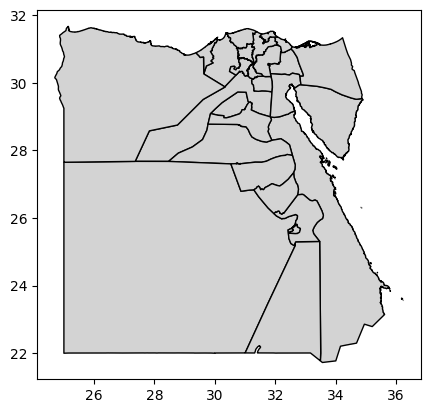

In [3]:
map.plot(color='lightgray', edgecolor='black')  # Plot the governorate Shapes

#### inserting each governorate name on the map 

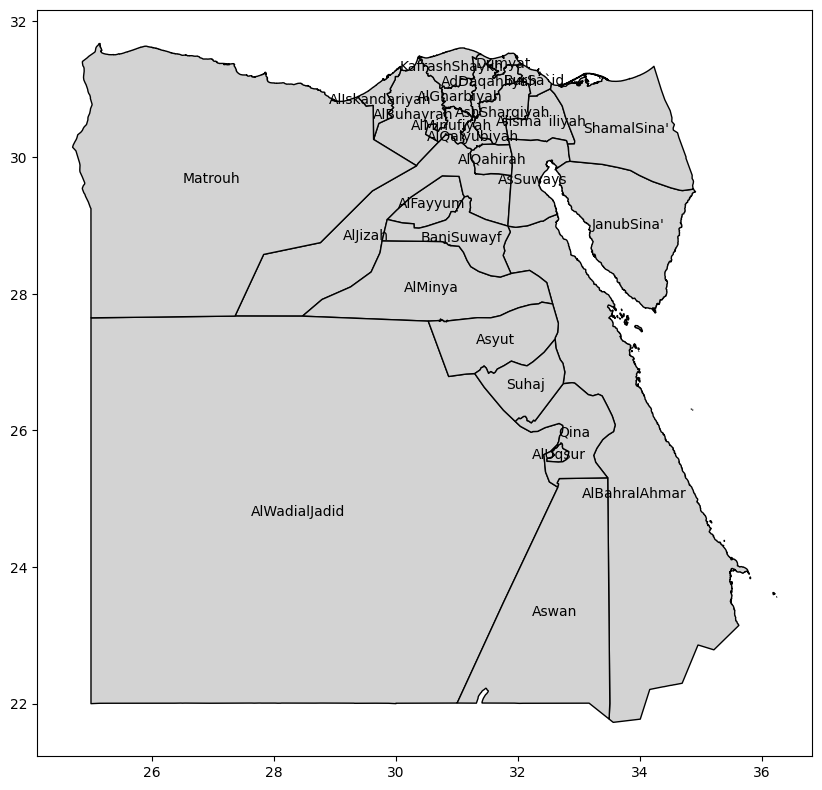

In [4]:
width = 10
height = 10

# Custome Figer with new size
fig, ax = plt.subplots(figsize=(width, height))

# Plot the governorate Shape
map.plot(ax=ax, color='lightgray', edgecolor='black')

# Add labels for governorate names
for indx, row in map.iterrows():
    centroid = row['geometry'].centroid
    governorate_name = row['NAME_1']
    ax.text(centroid.x, centroid.y, governorate_name,ha='center', va='center')


In [5]:
governorates_dict = {}

def Find_Neighbors(dataframe):
    
    for indx, row in dataframe.iterrows():
        governorate_name = row['NAME_1']
        neighbors = []

        for neighbor_indx, neighbor_row in dataframe.iterrows():
            neighbor_name = neighbor_row['NAME_1']

            if neighbor_name == governorate_name:
                continue

            if row['geometry'].intersects(neighbor_row['geometry']):
                neighbors.append(neighbor_name)

        governorates_dict[governorate_name] = neighbors

    return governorates_dict

In [6]:
outcome = Find_Neighbors(map)
for governorate, neighbors in outcome.items():
    print(governorate, neighbors)

AdDaqahliyah ['AlGharbiyah', 'AlQalyubiyah', 'AshSharqiyah', 'BurSa`id', 'Dumyat', 'KafrashShaykh']
AlBahralAhmar ['AlJizah', 'AlMinya', 'AsSuways', 'Aswan', 'Asyut', 'BaniSuwayf', 'Qina', 'Suhaj']
AlBuhayrah ['AlGharbiyah', 'AlIskandariyah', 'AlJizah', 'AlMinufiyah', 'KafrashShaykh', 'Matrouh']
AlFayyum ['AlJizah', 'BaniSuwayf']
AlGharbiyah ['AdDaqahliyah', 'AlBuhayrah', 'AlMinufiyah', 'AlQalyubiyah', 'KafrashShaykh']
AlIskandariyah ['AlBuhayrah', 'Matrouh']
AlIsma`iliyah ['AsSuways', 'AshSharqiyah', 'BurSa`id', "ShamalSina'"]
AlJizah ['AlBahralAhmar', 'AlBuhayrah', 'AlFayyum', 'AlMinufiyah', 'AlMinya', 'AlQahirah', 'AlQalyubiyah', 'AlWadialJadid', 'AsSuways', 'BaniSuwayf', 'Matrouh']
AlMinufiyah ['AlBuhayrah', 'AlGharbiyah', 'AlJizah', 'AlQalyubiyah']
AlMinya ['AlBahralAhmar', 'AlJizah', 'AlWadialJadid', 'Asyut', 'BaniSuwayf']
AlQahirah ['AlJizah', 'AlQalyubiyah', 'AsSuways', 'AshSharqiyah']
AlQalyubiyah ['AdDaqahliyah', 'AlGharbiyah', 'AlJizah', 'AlMinufiyah', 'AlQahirah', 'AshSharq

In [12]:
# Define colors
colors = ["red", "green", "blue", "yellow"]

# Define the function to check constraints
def check_constraints(state, color, assignment):
    for neighbor in governorates_dict[state]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True
# Define the backtracking search function 
def backtracking_search(assignment):
    if len(assignment) == len(governorates_dict):
        return assignment
    unassigned_states = [state for state in governorates_dict if state not in assignment]
    first_unassigned_state = unassigned_states[0]
    for color in colors:
        if check_constraints(first_unassigned_state, color, assignment):
            assignment[first_unassigned_state] = color
            result = backtracking_search(assignment)
            if result is not None:
                return result
            del assignment[first_unassigned_state]
    return None

# print the sloution as a list of tuples
def print_solution(solution):
    for governorate, color in solution.items():
        print(governorate, [color])
        
# Run the backtracking search
solution = backtracking_search({})
print_solution(solution)

AdDaqahliyah ['red']
AlBahralAhmar ['red']
AlBuhayrah ['red']
AlFayyum ['red']
AlGharbiyah ['green']
AlIskandariyah ['green']
AlIsma`iliyah ['red']
AlJizah ['green']
AlMinufiyah ['blue']
AlMinya ['blue']
AlQahirah ['red']
AlQalyubiyah ['yellow']
AlUqsur ['red']
AlWadialJadid ['red']
AsSuways ['blue']
AshSharqiyah ['green']
Aswan ['green']
Asyut ['green']
BaniSuwayf ['yellow']
BurSa`id ['blue']
Dumyat ['green']
JanubSina' ['red']
KafrashShaykh ['blue']
Matrouh ['blue']
Qina ['blue']
ShamalSina' ['green']
Suhaj ['yellow']


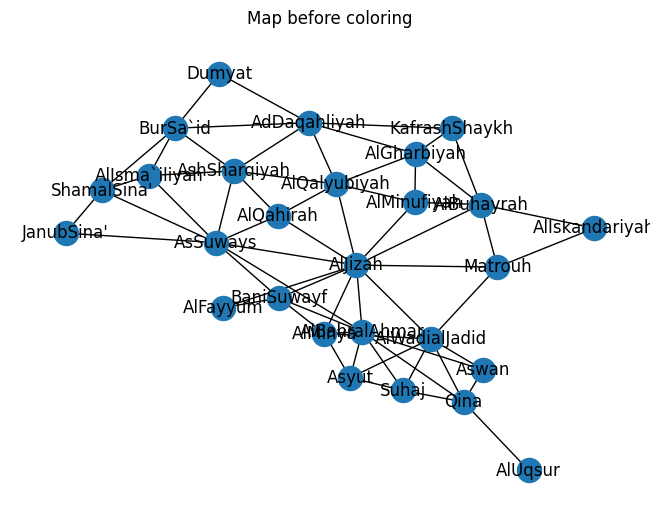

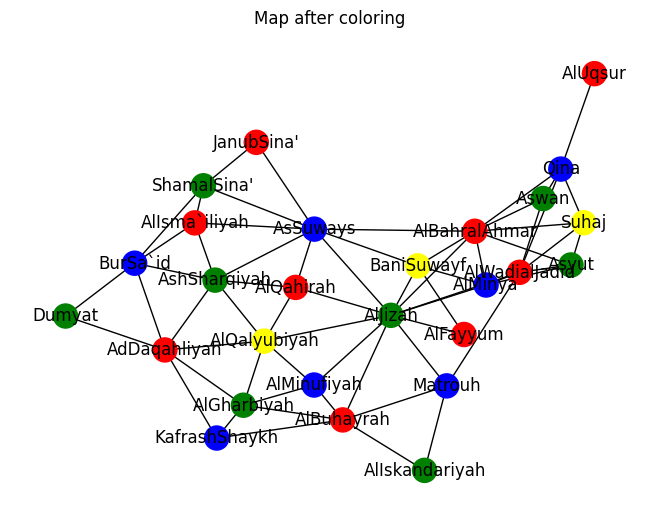

In [8]:
G = nx.Graph(governorates_dict)

# Draw the graph before coloring
nx.draw(G, with_labels=True)
plt.title("Map before coloring")
plt.show()

# Color the nodes based on the solution
color_map = [solution[state] for state in G.nodes()]

# Draw the graph after coloring
nx.draw(G, node_color=color_map, with_labels=True)
plt.title("Map after coloring")
plt.show()


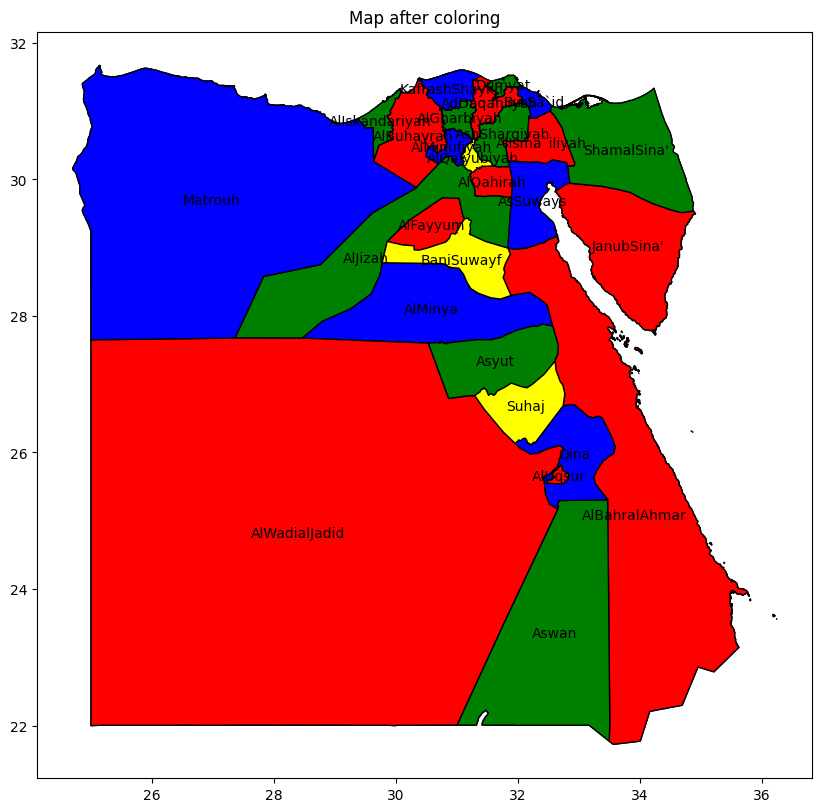

In [9]:
# Set the desired width and height of the figure
width = 10
height = 10

fig, ax = plt.subplots(figsize=(width, height))
map.plot(ax=ax, color='lightgray', edgecolor='black')

for idx, row in map.iterrows():
    centroid = row['geometry'].centroid
    governorate_name = row['NAME_1']
    ax.text(centroid.x, centroid.y, governorate_name, ha='center', va='center')

# Color the governorate polygons based on the solution
for idx, row in map.iterrows():
    governorate_name = row['NAME_1']
    color = solution.get(governorate_name, 'gray') 
    map.loc[map['NAME_1'] == governorate_name, 'color'] = color

map.plot(ax=ax, color=map['color'], edgecolor='black')

plt.title("Map after coloring")
plt.show()
